In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [ ]:
from google.colab import drive #Lo ligamos a nuestra memoria en drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Inteligencia artificial avanzada para la ciencia de datos/data/EchoNet-Dynamic/Videos'

KeyboardInterrupt: ignored

In [ ]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
dfF = pd.read_csv('FileList.csv')

In [ ]:
dfF.head()

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,0X100009310A3BD7FC,78.498406,14.881368,69.210534,112,112,50,174,VAL
1,0X1002E8FBACD08477,59.101988,40.383876,98.742884,112,112,50,215,TRAIN
2,0X1005D03EED19C65B,62.363798,14.267784,37.909734,112,112,50,104,TRAIN
3,0X10075961BC11C88E,54.545097,33.143084,72.914210,112,112,55,122,TRAIN
4,0X10094BA0A028EAC3,24.887742,127.581945,169.855024,112,112,52,207,VAL


In [ ]:
df_train = dfF[dfF['Split'] == "TRAIN"]

In [ ]:
df_train.head()

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
1,0X1002E8FBACD08477,59.101988,40.383876,98.742884,112,112,50,215,TRAIN
2,0X1005D03EED19C65B,62.363798,14.267784,37.909734,112,112,50,104,TRAIN
3,0X10075961BC11C88E,54.545097,33.143084,72.914210,112,112,55,122,TRAIN
6,0X100E3B8D3280BEC5,36.573739,81.747281,128.885543,112,112,38,101,TRAIN
7,0X100E491B3CD58DE2,33.991745,76.865569,116.448419,112,112,50,226,TRAIN


In [ ]:
df_val = dfF[dfF['Split'] == "VAL"]

In [ ]:
df_val.head()

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,0X100009310A3BD7FC,78.498406,14.881368,69.210534,112,112,50,174,VAL
4,0X10094BA0A028EAC3,24.887742,127.581945,169.855024,112,112,52,207,VAL
11,0X1013E8A4864781B,69.201743,9.822644,31.893505,112,112,47,140,VAL
26,0X1039B49145DF4F25,62.365051,34.467769,91.584471,112,112,50,154,VAL
34,0X105039B849CDB1CD,58.857155,30.502597,74.138279,112,112,50,212,VAL


In [ ]:
df_test = dfF[dfF['Split'] == "TEST"]

In [ ]:
df_test.head()

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
5,0X100CF05D141FF143,55.951790,47.453831,107.731578,112,112,50,248,TEST
10,0X1012703CDC1436FE,41.014425,71.379125,121.011152,112,112,50,201,TEST
19,0X102CFB07F752AAE6,50.794718,33.947173,68.990913,112,112,54,217,TEST
39,0X105B9EF57DE45DCB,50.634981,33.683545,68.233631,112,112,50,202,TEST
62,0X10A28877E97DF540,63.098086,47.376785,128.385713,112,112,50,211,TEST


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 1 to 10029
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FileName        7465 non-null   object 
 1   EF              7465 non-null   float64
 2   ESV             7465 non-null   float64
 3   EDV             7465 non-null   float64
 4   FrameHeight     7465 non-null   int64  
 5   FrameWidth      7465 non-null   int64  
 6   FPS             7465 non-null   int64  
 7   NumberOfFrames  7465 non-null   int64  
 8   Split           7465 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 583.2+ KB


In [ ]:
df_train.columns

Index(['FileName', 'EF', 'ESV', 'EDV', 'FrameHeight', 'FrameWidth', 'FPS',
       'NumberOfFrames', 'Split'],
      dtype='object')

In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1288 entries, 0 to 10022
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FileName        1288 non-null   object 
 1   EF              1288 non-null   float64
 2   ESV             1288 non-null   float64
 3   EDV             1288 non-null   float64
 4   FrameHeight     1288 non-null   int64  
 5   FrameWidth      1288 non-null   int64  
 6   FPS             1288 non-null   int64  
 7   NumberOfFrames  1288 non-null   int64  
 8   Split           1288 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 100.6+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 5 to 10024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FileName        1277 non-null   object 
 1   EF              1277 non-null   float64
 2   ESV             1277 non-null   float64
 3   EDV             1277 non-null   float64
 4   FrameHeight     1277 non-null   int64  
 5   FrameWidth      1277 non-null   int64  
 6   FPS             1277 non-null   int64  
 7   NumberOfFrames  1277 non-null   int64  
 8   Split           1277 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 99.8+ KB


In [ ]:
import os
# Ruta de la carpeta que quieres contar
carpeta = '/content/drive/MyDrive/Inteligencia artificial avanzada para la ciencia de datos/data/EchoNet-Dynamic/Videos'

# Utiliza os.listdir() para obtener una lista de los nombres de archivos en la carpeta
archivos = os.listdir(carpeta)

# Usa len() para contar la cantidad de elementos en la lista, que son los archivos
cantidad_archivos = len(archivos)

print(cantidad_archivos)

10056


In [ ]:
dfVT = pd.read_csv('VolumeTracings.csv')

In [ ]:
dfVT.head(42)

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46
5,0X100009310A3BD7FC.avi,47.962105,29.759513,65.810920,25.221679,46
6,0X100009310A3BD7FC.avi,48.167915,32.723188,68.247043,27.618326,46
7,0X100009310A3BD7FC.avi,48.373726,35.686864,70.385311,30.090698,46
8,0X100009310A3BD7FC.avi,48.579537,38.650539,72.523579,32.563071,46
9,0X100009310A3BD7FC.avi,49.014039,41.556073,74.151644,35.165156,46


In [ ]:
from google.colab.patches import cv2_imshow
import cv2

carpeta_mask = 'mascaras'  # Carpeta para guardar las mascaras
carpeta_og = 'imagenes'  # Carpeta para guardar las mascaras
os.makedirs(carpeta_mask, exist_ok=True)
os.makedirs(carpeta_og, exist_ok=True)

def procesar_video(carpeta, df_train, dfVT):
    # Obtener los nombres de los videos
    nombres_videos = os.listdir(carpeta)

    for nombre_video in nombres_videos:
        if nombre_video.endswith('.avi'):
            video_nombre = os.path.join(carpeta, nombre_video)
            video_nombre = os.path.basename(video_nombre)

            nombre_video2 = os.path.splitext(nombre_video)[0]


            # Verificar si el nombre del video coincide con algún nombre en df_train
            if nombre_video2 in df_train['FileName'].values:
              video = cv2.VideoCapture(video_nombre)

    # Obtener la lista de frames únicos de interés de dfVT
              frames_unicos = dfVT[dfVT['FileName'] == video_nombre]['Frame'].unique()

    # Iterar a través de los frames únicos
              for frame_numero in frames_unicos:
        # Filtrar los puntos del frame actual
                puntos_poligonos = [] # Lista para almacenar todos los puntos

                for index, row in dfVT[(dfVT['FileName'] == video_nombre) & (dfVT['Frame'] == frame_numero)].iterrows():
            # Agregar los puntos del polígono a la lista
                  puntos_poligonos.append((int(row['X1']), int(row['Y1'])))
                  puntos_poligonos.append((int(row['X2']), int(row['Y2'])))

        # Ir al cuadro deseado
                video.set(cv2.CAP_PROP_POS_FRAMES, int(frame_numero))

        # Leer el cuadro
                ret, frame = video.read()

        # Crear una máscara en blanco del mismo tamaño que el cuadro
                mascara = np.zeros_like(frame)

        #Es necesaroio que se ordenen en orden de las manecillas del reloj para que rellene bien
                centro = np.mean(puntos_poligonos, axis=0)
                puntos_poligonos = sorted(puntos_poligonos, key=lambda punto: np.arctan2(punto[1] - centro[1], punto[0] - centro[0]))

        # Dibujar el polígono en la máscara
                cv2.fillPoly(mascara, [np.array(puntos_poligonos)], (255, 255, 255))  # Rellenar el polígono con blanco

        # Mostrar la imagen original
                #print(f'Frame {frame_numero} sin máscara:')
                #cv2_imshow(frame)

        # Mostrar la imagen con máscara
                #print(f'Frame {frame_numero} con máscara:')
                #cv2_imshow(mascara)

                nombre_archivo = os.path.join(carpeta_mask, f'{nombre_video2}_frame_{frame_numero}_mask.png')
                cv2.imwrite(nombre_archivo, cv2.fillPoly(mascara, [np.array(puntos_poligonos)], (255, 255, 255)))

                nombre_archivo_original = os.path.join(carpeta_og, f'{nombre_video2}_frame_{frame_numero}_og.png')
                cv2.imwrite(nombre_archivo_original, frame)

    # Liberar el video
              video.release()


Frame 3 sin máscara:


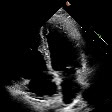

Frame 3 con máscara:


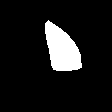

Frame 18 sin máscara:


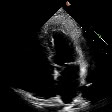

Frame 18 con máscara:


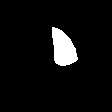

In [ ]:
# Ejemplo de uso:
#video_a_procesar = '0X1002E8FBACD08477.avi'
#procesar_video(video_a_procesar, dfVT)

In [ ]:
procesar_video(carpeta, df_train, dfVT)